Первый слой сети, который смотрит на изображения, зависит от цветов. Если изображение цветное, он смотрит на три цвета: красный, зеленый и синий. Если черно-белое - только на один цвет.

Последний слой сети, который решает, к какому классу относится изображение, зависит от классов. Если имеется 100 классов, то в этом слое 100 “детекторов”, каждый из которых ищет свой класс. Если классов 20, то детекторов тоже 20.

In [3]:
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Слои свертки (Conv2D): Эти слои анализируют изображение и выделяют небольшие фрагменты. Количество фильтров в слое свертки - количество уникальных признаков, чем их больше - тем лучше

Слои подвыборки (MaxPooling2D): Эти слои сжимают данные, оставляя лишь важные признаки. Это позволяет уменьшить объем данных и избежать переобучения модели.

Полносвязные слои (Dense): Эти слои классифицируют изображения на основе признаков, извлеченных слоями свертки и подвыборки. Первый полносвязный слой имеет 64 нейрона, а выходной слой имеет столько нейронов, сколько классов в задаче (100 или 20).

Выбор гиперпараметров обычно основывается на опыте и экспериментах. В данном случае были выбраны 3 слоя свертки с 32 и 64 фильтрами, что является стандартной практикой для небольших изображений, таких как CIFAR (https://github.com/BillyBSig/CIFAR-100-TFDS/blob/main/CIFAR_100_TFDS_.ipynb https://www.kaggle.com/code/pierrevignoles/classification-with-cnn-on-cifar-100/notebook) . Также были использованы слои MaxPooling после каждого слоя свертки для уменьшения размерности. Были выбраны 64 нейрона для первого полносвязного слоя, что является достаточным для этой задачи. Наконец, была использована функция активации ReLU и оптимизатор Adam, которые являются стандартными выборами для таких задач. Количество эпох (10) было выбрано для баланса между временем обучения и производительностью модели.

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='fine')
train_images, test_images = train_images / 255.0, test_images / 255.0
model_100 = models.Sequential()
model_100.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_100.add(layers.MaxPooling2D((2, 2)))
model_100.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_100.add(layers.MaxPooling2D((2, 2)))
model_100.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_100.add(layers.Flatten())
model_100.add(layers.Dense(64, activation='relu'))
model_100.add(layers.Dense(100)) 
model_100.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_100 = model_100.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))



Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 3.9636 - accuracy: 0.0951 - val_loss: 3.5816 - val_accuracy: 0.1560
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 3.3650 - accuracy: 0.1878 - val_loss: 3.2138 - val_accuracy: 0.2163
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 3.0795 - accuracy: 0.2426 - val_loss: 3.0223 - val_accuracy: 0.2601
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.9098 - accuracy: 0.2753 - val_loss: 2.9504 - val_accuracy: 0.2683
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.7866 - accuracy: 0.2994 - val_loss: 2.8511 - val_accuracy: 0.2896
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.6915 - accuracy: 0.3214 - val_loss: 2.8139 - val_accuracy: 0.3029
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.6076 - accuracy: 0.3370 - val_loss: 2.7242 -

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')
train_images, test_images = train_images / 255.0, test_images / 255.0
model_20 = models.Sequential()
model_20.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_20.add(layers.MaxPooling2D((2, 2)))
model_20.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_20.add(layers.MaxPooling2D((2, 2)))
model_20.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_20.add(layers.Flatten())
model_20.add(layers.Dense(64, activation='relu'))
model_20.add(layers.Dense(20))
model_20.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history_20 = model_20.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.4965 - accuracy: 0.2195 - val_loss: 2.2768 - val_accuracy: 0.2993
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.1153 - accuracy: 0.3423 - val_loss: 2.0406 - val_accuracy: 0.3705
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.9214 - accuracy: 0.4019 - val_loss: 1.8821 - val_accuracy: 0.4158
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7944 - accuracy: 0.4417 - val_loss: 1.8022 - val_accuracy: 0.4443
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6994 - accuracy: 0.4700 - val_loss: 1.7512 - val_accuracy: 0.4579
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6292 - accuracy: 0.4871 - val_loss: 1.7200 - val_accuracy: 0.4660
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5619 - accuracy: 0.5093 - val_loss: 1.7809 -

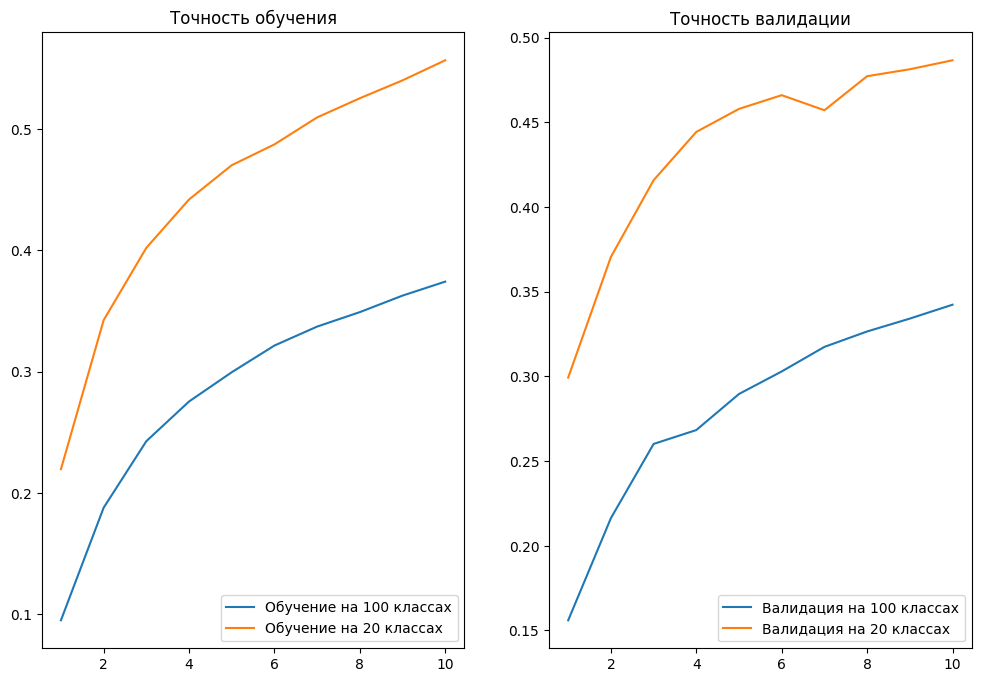

In [6]:
acc_100 = history_100.history['accuracy']
val_acc_100 = history_100.history['val_accuracy']
acc_20 = history_20.history['accuracy']
val_acc_20 = history_20.history['val_accuracy']
epochs_range = range(1, len(acc_100) + 1)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_100, label='Обучение на 100 классах')
plt.plot(epochs_range, acc_20, label='Обучение на 20 классах')
plt.legend(loc='lower right')
plt.title('Точность обучения')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_acc_100, label='Валидация на 100 классах')
plt.plot(epochs_range, val_acc_20, label='Валидация на 20 классах')
plt.legend(loc='lower right')
plt.title('Точность валидации')
plt.show()


In [7]:
y_pred_100 = model_100.predict(test_images)
y_pred_labels_100 = np.argmax(y_pred_100, axis=1)
report_100 = classification_report(test_labels, y_pred_labels_100)
print("Отчет о классификации для 100 классов:\n", report_100)


313/313 [==============================] - 1s 4ms/step
Отчет о классификации для 100 классов:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.51      0.10      0.16       500
           2       0.04      0.01      0.01       500
           3       0.05      0.00      0.00       500
           4       0.00      0.00      0.00       500
           5       0.03      0.01      0.01       500
           6       0.01      0.00      0.00       500
           7       0.55      0.09      0.16       500
           8       0.03      0.01      0.01       500
           9       0.01      0.00      0.00       500
          10       0.00      0.00      0.00       500
          11       0.00      0.00      0.00       500
          12       0.00      0.00      0.00       500
          13       0.01      0.00      0.00       500
          14       0.03      0.00      0.01       500
          15       0.03      0.00      0

c:\Users\wildFLEXXX\Desktop\final-exam\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wildFLEXXX\Desktop\final-exam\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wildFLEXXX\Desktop\final-exam\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
y_pred_20 = model_20.predict(test_images)
y_pred_labels_20 = np.argmax(y_pred_20, axis=1)
report_20 = classification_report(test_labels, y_pred_labels_20)
print("Отчет о классификации для 20 классов:\n", report_20)

313/313 [==============================] - 1s 3ms/step
Отчет о классификации для 20 классов:
               precision    recall  f1-score   support

           0       0.45      0.35      0.40       500
           1       0.39      0.51      0.44       500
           2       0.64      0.71      0.67       500
           3       0.51      0.49      0.50       500
           4       0.56      0.54      0.55       500
           5       0.39      0.36      0.37       500
           6       0.52      0.59      0.56       500
           7       0.46      0.52      0.49       500
           8       0.35      0.51      0.42       500
           9       0.63      0.53      0.58       500
          10       0.70      0.69      0.70       500
          11       0.41      0.38      0.39       500
          12       0.36      0.38      0.37       500
          13       0.33      0.20      0.25       500
          14       0.57      0.61      0.59       500
          15       0.32      0.28      0.

In [14]:
for class_label in range(100):
    print(f"Класс {class_label+1}:")
    if class_label < 20:
        print(f"  Узкий класс: {report_100[str(class_label)]['f1-score']}")
        print(f"  Широкий класс: {report_20[str(class_label)]['f1-score']}")
    else:
        print(f"  Узкий класс: {report_100[str(class_label)]['f1-score']}")

Класс 1:
  Узкий класс: 0.0
  Широкий класс: 0.3968609865470851
Класс 2:
  Узкий класс: 0.1644295302013423
  Широкий класс: 0.44097222222222227
Класс 3:
  Узкий класс: 0.013289036544850499
  Широкий класс: 0.6748815165876777
Класс 4:
  Узкий класс: 0.0038387715930902114
  Широкий класс: 0.49744114636642783
Класс 5:
  Узкий класс: 0.0
  Широкий класс: 0.5494949494949495
Класс 6:
  Узкий класс: 0.010067114093959733
  Широкий класс: 0.374485596707819
Класс 7:
  Узкий класс: 0.0030769230769230774
  Широкий класс: 0.5553470919324578
Класс 8:
  Узкий класс: 0.15753424657534248
  Широкий класс: 0.4864864864864865
Класс 9:
  Узкий класс: 0.01016949152542373
  Широкий класс: 0.41577649958915364
Класс 10:
  Узкий класс: 0.0035026269702276708
  Широкий класс: 0.579175704989154
Класс 11:
  Узкий класс: 0.0
  Широкий класс: 0.6950354609929078
Класс 12:
  Узкий класс: 0.0
  Широкий класс: 0.3924843423799583
Класс 13:
  Узкий класс: 0.0
  Широкий класс: 0.37173281703775407
Класс 14:
  Узкий класс: 0.

Из полученных данных видно, что модель, обученная на 20 широких классах, в целом показывает лучшую производительность по сравнению с моделью, обученной на 100 узких классах. Это ожидаемо, так как задача классификации становится сложнее с увеличением количества классов.

Однако стоит заметить, что для некоторых классов модель, обученная на 100 узких классах, показывает нулевую точность. Это может быть связано с несколькими причинами:

1) Недостаточное количество обучающих данных
2) Сложность класса (классы могут быть похожи)
3) Переобучение

In [ ]:
model_100.save('100.keras')
model_20.save('20.keras')

Данный код сохраняет модель в формате .keras, который позволяет загрузить её в дальнейшем.